In [1]:
def subarray_sum(n,arr,k):
    count = 0
    currsum = 0
    prefixsum = {}
    for i in range(0,n,1):
        currsum = currsum + arr[i]
        if currsum == k:
            count += 1
        if currsum-k in prefixsum:
            count = count + prefixsum[currsum-k]
        prefixsum[currsum] = prefixsum.get(currsum,0) + 1
    return count
n = int(input())
arr = list(map(int,input().split()))
k = int(input())
print(subarray_sum(n,arr,k))

KeyboardInterrupt: Interrupted by user

Import libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Feature scaling (Data Cleaning)
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, confusion_matrix
import joblib

Load data


In [78]:
emp_data = pd.read_csv('EmployeeAttritionDataset.csv')

Create Copy 



In [79]:
emp = emp_data.copy()

Preview data

In [80]:
print(emp.shape)

(1470, 35)


Show 1st 5 data from dataset

In [81]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Show last 5 data from dataset

In [82]:
emp.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


Info of the data

In [83]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Summary of the data

In [84]:
emp.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Data preprocessing 

Printing all columns of dataset

In [85]:
print(emp.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


Working on minimal data

In [86]:
emp = emp[['Age', 'DistanceFromHome', 'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'Attrition']]

Drop duplicates

In [87]:
emp.drop_duplicates(keep='first', inplace=True)

Check null values

In [88]:
emp.isnull().sum()

Age                 0
DistanceFromHome    0
JobSatisfaction     0
MonthlyIncome       0
OverTime            0
Attrition           0
dtype: int64

In [89]:
print(emp.columns) # printing the columns

Index(['Age', 'DistanceFromHome', 'JobSatisfaction', 'MonthlyIncome',
       'OverTime', 'Attrition'],
      dtype='object')


Convert 'Attrition' to binary (yes = 1, no = 0)

In [90]:
emp['Attrition'] = emp['Attrition'].map({'Yes': 1, 'No': 0})

Convert 'Overtime' to binary (yes = 1, no = 0)

In [91]:
emp['OverTime_Yes'] = emp['OverTime'].map({'Yes': 1, 'No': 0})
emp.drop(columns=['OverTime'], inplace=True)

Drop 'Attrition'

In [92]:
X = emp.drop('Attrition', axis=1)
y = emp['Attrition']

Feature scaling

In [93]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Exploratory Data Analysis (EDA)

Overtime  Count

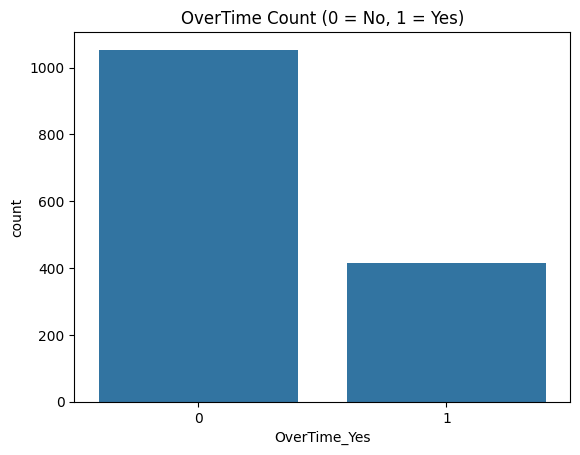

In [96]:
sns.countplot(x='OverTime_Yes', data=emp)
plt.title('OverTime Count (0 = No, 1 = Yes)')
plt.show()

Correlation heatmap (numeric feaatures only)

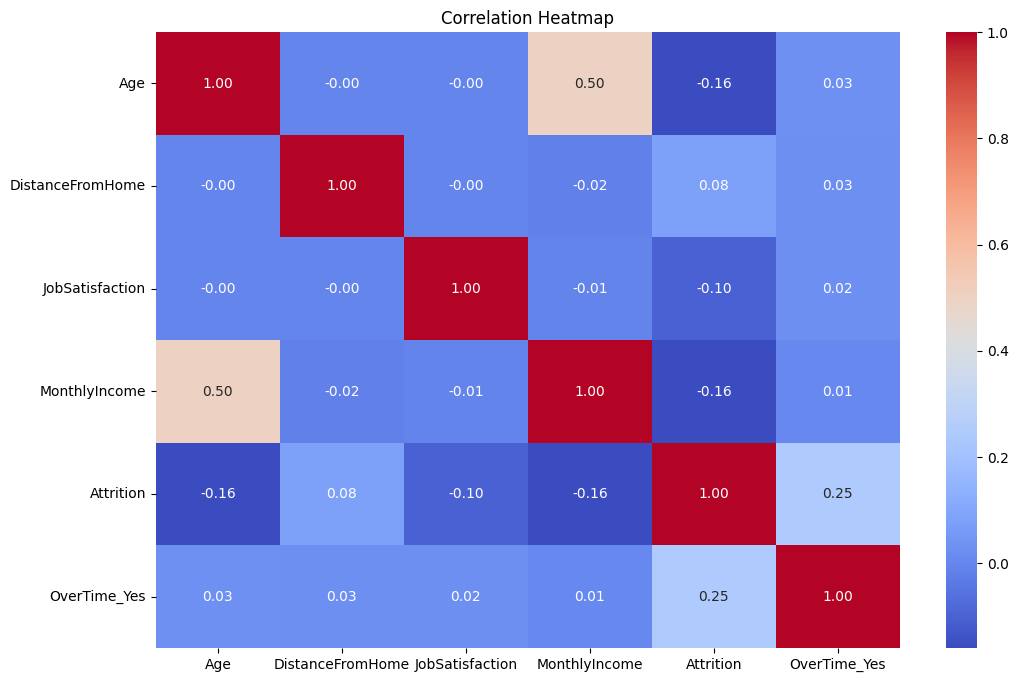

In [98]:
plt.figure(figsize=(12, 8))
corr = emp.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Attrition by age

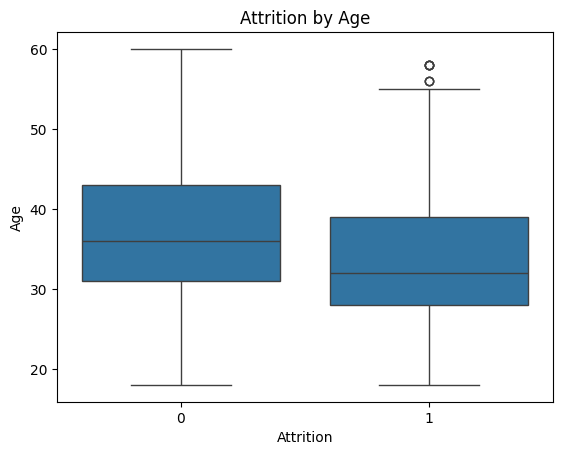

In [99]:
sns.boxplot(x='Attrition', y='Age', data=emp)
plt.title("Attrition by Age")
plt.show()

Attrition by monthly income 

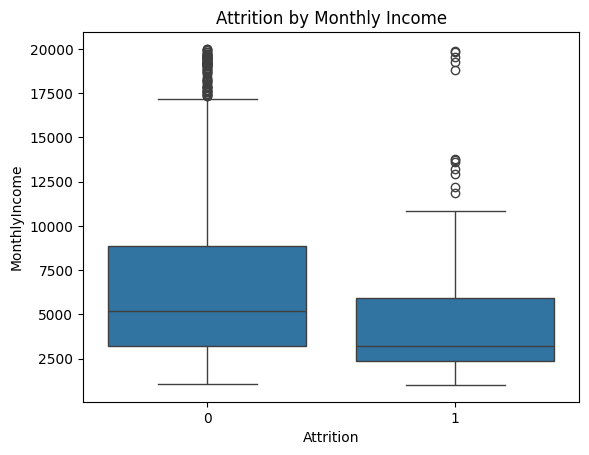

In [100]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=emp)
plt.title('Attrition by Monthly Income')
plt.show()

Job Satisfaction count

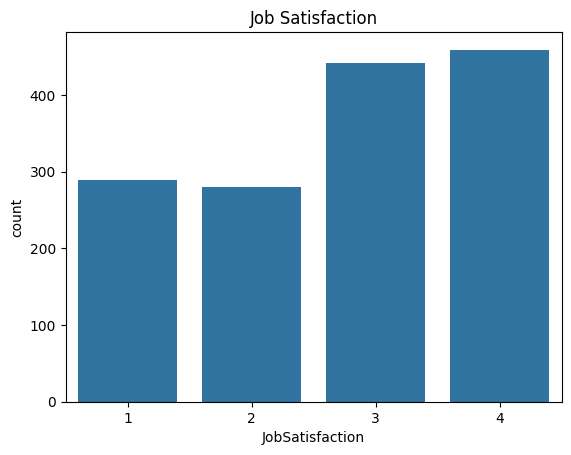

In [101]:
sns.countplot(x='JobSatisfaction', data=emp)
plt.title("Job Satisfaction")
plt.show()

Model building and evaluation

Split data

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train model

In [103]:
model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

In [104]:
y_pred = model.predict(X_test)

In [105]:
joblib.dump(model, 'attrition_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

print("✅ Model, scaler, and column list saved.")

✅ Model, scaler, and column list saved.
